In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2023-us-civil-flights-delay-meteo-and-aircraft/US_flights_2023.csv
/kaggle/input/2023-us-civil-flights-delay-meteo-and-aircraft/airports_geolocation.csv
/kaggle/input/2023-us-civil-flights-delay-meteo-and-aircraft/weather_meteo_by_airport.csv
/kaggle/input/2023-us-civil-flights-delay-meteo-and-aircraft/Cancelled_Diverted_2023.csv
/kaggle/input/2023-us-civil-flights-delay-meteo-and-aircraft/maj us flight - january 2024.csv


# ✈️ US Aviation Delay Analysis 2023 - Training Path

A progressive, hands-on learning journey through real-world aviation data analysis using pandas.

---

## 🎮 How This Works

Each task is designed as a **skill-building exercise** with:
- Clear learning objectives
- Step-by-step instructions
- Expected outcomes
- XP points based on difficulty

**Total XP Available:** 1,850 XP

---

## 📊 Task Overview by Category

| Category | Tasks | Total XP |
|----------|-------|----------|
| Data Loading & Inspection | 1-3 | 250 XP |
| Data Cleaning | 4-6 | 300 XP |
| Indexing & Time Operations | 7-8 | 200 XP |
| Merging & Joining | 9-12 | 450 XP |
| Feature Engineering | 13-14 | 200 XP |
| Aggregation & Analysis | 15-17 | 300 XP |
| Advanced Analytics | 18-20 | 400 XP |

---

In [2]:
# CREATE YOUR CODE HERE

# IMPORTING THE DATASET

flights_df = pd.read_csv('/kaggle/input/2023-us-civil-flights-delay-meteo-and-aircraft/US_flights_2023.csv')

In [3]:
# US FLIGHTS
flights_df.head(10)

,FlightDate,Day_Of_Week,Airline,Tail_Number,Dep_Airport,Dep_CityName,DepTime_label,Dep_Delay,Dep_Delay_Tag,Dep_Delay_Type,...,Flight_Duration,Distance_type,Delay_Carrier,Delay_Weather,Delay_NAS,Delay_Security,Delay_LastAircraft,Manufacturer,Model,Aicraft_age
0,2023-01-02,1,Endeavor Air,N605LR,BDL,"Hartford, CT",Morning,-3,0,Low <5min,...,56,Short Haul >1500Mi,0,0,0,0,0,CANADAIR REGIONAL JET,CRJ,16
1,2023-01-03,2,Endeavor Air,N605LR,BDL,"Hartford, CT",Morning,-5,0,Low <5min,...,62,Short Haul >1500Mi,0,0,0,0,0,CANADAIR REGIONAL JET,CRJ,16
2,2023-01-04,3,Endeavor Air,N331PQ,BDL,"Hartford, CT",Morning,-5,0,Low <5min,...,49,Short Haul >1500Mi,0,0,0,0,0,CANADAIR REGIONAL JET,CRJ,10
3,2023-01-05,4,Endeavor Air,N906XJ,BDL,"Hartford, CT",Morning,-6,0,Low <5min,...,54,Short Haul >1500Mi,0,0,0,0,0,CANADAIR REGIONAL JET,CRJ,17
4,2023-01-06,5,Endeavor Air,N337PQ,BDL,"Hartford, CT",Morning,-1,0,Low <5min,...,50,Short Haul >1500Mi,0,0,0,0,0,CANADAIR REGIONAL JET,CRJ,10
5,2023-01-07,6,Endeavor Air,N336PQ,BDL,"Hartford, CT",Morning,-10,0,Low <5min,...,62,Short Haul >1500Mi,0,0,0,0,0,CANADAIR REGIONAL JET,CRJ,10
6,2023-01-14,6,Endeavor Air,N311PQ,LGA,"New York, NY",Afternoon,-8,0,Low <5min,...,117,Short Haul >1500Mi,0,0,0,0,0,CANADAIR REGIONAL JET,CRJ,10
7,2023-01-21,6,Endeavor Air,N917XJ,LGA,"New York, NY",Afternoon,-10,0,Low <5min,...,125,Short Haul >1500Mi,0,0,0,0,0,CANADAIR REGIONAL JET,CRJ,16
8,2023-01-28,6,Endeavor Air,N336PQ,LGA,"New York, NY",Afternoon,-5,0,Low <5min,...,130,Short Haul >1500Mi,0,0,0,0,0,CANADAIR REGIONAL JET,CRJ,10
9,2023-01-09,1,Endeavor Air,N491PX,LGA,"New York, NY",Evening,-7,0,Low <5min,...,63,Short Haul >1500Mi,0,0,0,0,0,CANADAIR REGIONAL JET,CRJ,4


In [4]:
# SHAPE, INFO(), DESCRIBE()
print("This is the shape of the dataset: ", flights_df.shape)



This is the shape of the dataset:  (6743404, 24)


In [5]:
print("This is the info of the dataset: ", flights_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6743404 entries, 0 to 6743403
Data columns (total 24 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   FlightDate          object
 1   Day_Of_Week         int64 
 2   Airline             object
 3   Tail_Number         object
 4   Dep_Airport         object
 5   Dep_CityName        object
 6   DepTime_label       object
 7   Dep_Delay           int64 
 8   Dep_Delay_Tag       int64 
 9   Dep_Delay_Type      object
 10  Arr_Airport         object
 11  Arr_CityName        object
 12  Arr_Delay           int64 
 13  Arr_Delay_Type      object
 14  Flight_Duration     int64 
 15  Distance_type       object
 16  Delay_Carrier       int64 
 17  Delay_Weather       int64 
 18  Delay_NAS           int64 
 19  Delay_Security      int64 
 20  Delay_LastAircraft  int64 
 21  Manufacturer        object
 22  Model               object
 23  Aicraft_age         int64 
dtypes: int64(11), object(13)
memory usage: 1.2+ GB
Thi

In [6]:
print("This is the description of the dataset: ", flights_df.describe())

This is the description of the dataset:          Day_Of_Week     Dep_Delay  Dep_Delay_Tag     Arr_Delay  \
count  6.743404e+06  6.743404e+06   6.743404e+06  6.743404e+06   
mean   3.982793e+00  1.220099e+01   3.790013e-01  6.627152e+00   
std    2.001762e+00  5.507936e+01   4.851385e-01  5.707892e+01   
min    1.000000e+00 -9.900000e+01   0.000000e+00 -1.190000e+02   
25%    2.000000e+00 -5.000000e+00   0.000000e+00 -1.500000e+01   
50%    4.000000e+00 -2.000000e+00   0.000000e+00 -6.000000e+00   
75%    6.000000e+00  9.000000e+00   1.000000e+00  9.000000e+00   
max    7.000000e+00  4.413000e+03   1.000000e+00  4.405000e+03   

       Flight_Duration  Delay_Carrier  Delay_Weather     Delay_NAS  \
count     6.743404e+06   6.743404e+06   6.743404e+06  6.743404e+06   
mean      1.402978e+02   5.169804e+00   7.428505e-01  2.566957e+00   
std       7.287216e+01   3.645732e+01   1.435393e+01  1.500484e+01   
min       0.000000e+00   0.000000e+00   0.000000e+00  0.000000e+00   
25%       8.70

In [7]:
# CREATE YOUR CODE HERE
airports_df = pd.read_csv('/kaggle/input/2023-us-civil-flights-delay-meteo-and-aircraft/airports_geolocation.csv')
maj_df = pd.read_csv('/kaggle/input/2023-us-civil-flights-delay-meteo-and-aircraft/maj us flight - january 2024.csv')
weather_df = pd.read_csv('/kaggle/input/2023-us-civil-flights-delay-meteo-and-aircraft/weather_meteo_by_airport.csv')
cancelled_df = pd.read_csv('/kaggle/input/2023-us-civil-flights-delay-meteo-and-aircraft/Cancelled_Diverted_2023.csv')

In [8]:
cancelled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104488 entries, 0 to 104487
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   FlightDate          104488 non-null  object 
 1   Day_Of_Week         104488 non-null  int64  
 2   Airline             104488 non-null  object 
 3   Tail_Number         104488 non-null  object 
 4   Cancelled           104488 non-null  float64
 5   Diverted            104488 non-null  float64
 6   Dep_Airport         104488 non-null  object 
 7   Dep_CityName        104488 non-null  object 
 8   DepTime_label       104488 non-null  object 
 9   Dep_Delay           104488 non-null  float64
 10  Dep_Delay_Tag       104488 non-null  int64  
 11  Dep_Delay_Type      104488 non-null  object 
 12  Arr_Airport         104488 non-null  object 
 13  Arr_CityName        104488 non-null  object 
 14  Arr_Delay           104488 non-null  float64
 15  Arr_Delay_Type      104488 non-nul

In [9]:
airports_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IATA_CODE  364 non-null    object 
 1   AIRPORT    364 non-null    object 
 2   CITY       364 non-null    object 
 3   STATE      364 non-null    object 
 4   COUNTRY    364 non-null    object 
 5   LATITUDE   364 non-null    float64
 6   LONGITUDE  364 non-null    float64
dtypes: float64(2), object(5)
memory usage: 20.0+ KB


In [10]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132860 entries, 0 to 132859
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   time        132860 non-null  object 
 1   tavg        132860 non-null  float64
 2   tmin        132860 non-null  float64
 3   tmax        132860 non-null  float64
 4   prcp        132860 non-null  float64
 5   snow        132860 non-null  float64
 6   wdir        132860 non-null  float64
 7   wspd        132860 non-null  float64
 8   pres        132860 non-null  float64
 9   airport_id  132860 non-null  object 
dtypes: float64(8), object(2)
memory usage: 10.1+ MB


In [11]:
maj_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527197 entries, 0 to 527196
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   FlightDate          527197 non-null  object
 1   Day_Of_Week         527197 non-null  int64 
 2   Airline             527197 non-null  object
 3   Tail_Number         527197 non-null  object
 4   Dep_Airport         527197 non-null  object
 5   Dep_CityName        527197 non-null  object
 6   DepTime_label       527197 non-null  object
 7   Dep_Delay           527197 non-null  int64 
 8   Dep_Delay_Tag       527197 non-null  int64 
 9   Dep_Delay_Type      527197 non-null  object
 10  Arr_Airport         527197 non-null  object
 11  Arr_CityName        527197 non-null  object
 12  Arr_Delay           527197 non-null  int64 
 13  Arr_Delay_Type      527197 non-null  object
 14  Flight_Duration     527197 non-null  int64 
 15  Distance_type       527197 non-null  object
 16  De

## 🚀 Data Insights Journey

### **LEVEL 1: Dataset Profiling & Discovery** (250 XP)

#### Task 1: Flight Operations Landscape Analysis
**Goal:** Understand the scale and characteristics of 2023 US flight operations.

**Business Questions (50 XP):**

1. What is the operational scale of the dataset (total flights, data volume)?
2. What is the date range coverage - does it span the full year 2023?
3. Which airlines dominate the market by flight volume?
4. What is the geographic footprint (unique airports, city pairs)?
5. What aircraft characteristics are tracked (manufacturers, models, age distribution)?
6. What delay categories exist and what are their baseline statistics?
7. What percentage of flights experienced delays vs on-time operations?

**Insight Objectives:**
- Quantify the aviation ecosystem captured in the data
- Identify market leaders and operational patterns
- Establish baseline performance metrics
- Understand data granularity and tracking capabilities

In [12]:
# TABLE INFORMATION
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6743404 entries, 0 to 6743403
Data columns (total 24 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   FlightDate          object
 1   Day_Of_Week         int64 
 2   Airline             object
 3   Tail_Number         object
 4   Dep_Airport         object
 5   Dep_CityName        object
 6   DepTime_label       object
 7   Dep_Delay           int64 
 8   Dep_Delay_Tag       int64 
 9   Dep_Delay_Type      object
 10  Arr_Airport         object
 11  Arr_CityName        object
 12  Arr_Delay           int64 
 13  Arr_Delay_Type      object
 14  Flight_Duration     int64 
 15  Distance_type       object
 16  Delay_Carrier       int64 
 17  Delay_Weather       int64 
 18  Delay_NAS           int64 
 19  Delay_Security      int64 
 20  Delay_LastAircraft  int64 
 21  Manufacturer        object
 22  Model               object
 23  Aicraft_age         int64 
dtypes: int64(11), object(13)
memory usage: 1.2+ GB


In [13]:
# 1. What is the operational scale of the dataset (total flights, data volume)?

# TOTAL FLIGHTS
total_flights = flights_df.shape[0]
total_flights

# DATA VOLUME
data_volume = ((flights_df.memory_usage().sum())/1024**3).round(2)


print(f"Total Flights = {total_flights}")
print(f"Data Volume = {data_volume} GB")

Total Flights = 6743404
Data Volume = 1.21 GB


In [14]:
# 2. What is the date range coverage - does it span the full year 2023?

flight_date = pd.to_datetime(flights_df['FlightDate'])
print(flight_date.min(), flight_date.max())

unique_dates = flights_df['FlightDate'].nunique()
unique_dates

2023-01-01 00:00:00 2023-12-31 00:00:00


365

Text(0.5, 1.0, 'Top 5 Airlines by Flight Volume')

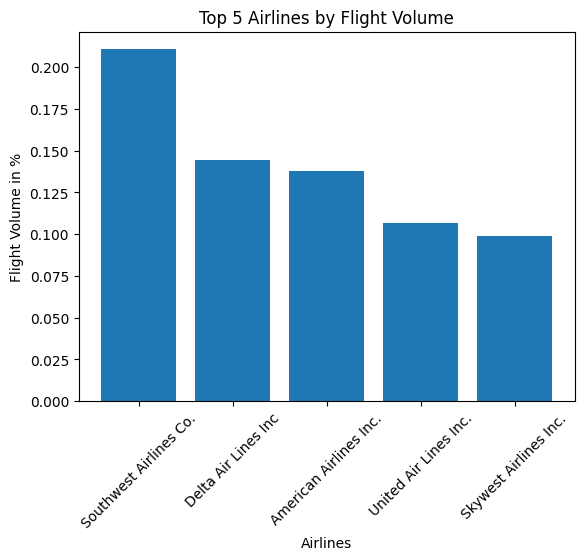

In [15]:
# 3. Which airlines dominate the market by flight volume?
top_5_flights = flights_df.sort_values('Airline').value_counts('Airline', normalize=True).head(5)
top_5_flights

plt.bar(top_5_flights.index, top_5_flights.values)
plt.xticks(rotation=45)
plt.xlabel('Airlines')
plt.ylabel('Flight Volume in %')
plt.title('Top 5 Airlines by Flight Volume')


In [16]:
# 4. What is the geographic footprint (unique airports, city pairs)?
flights_df.head(1)

dep_airport = flights_df['Dep_Airport'].nunique()
dep_airport

arr_airport = flights_df['Arr_Airport'].nunique()
arr_airport

dep_arr_airport = pd.concat([flights_df['Dep_Airport'], flights_df['Arr_Airport']])
unique = pd.unique(dep_arr_airport)
unique

array(['BDL', 'LGA', 'DLH', 'ATL', 'FAY', 'JFK', 'ORF', 'MSP', 'PIT',
       'BWI', 'ROA', 'DTW', 'TYS', 'CVG', 'ILM', 'CID', 'CRW', 'BGR',
       'RDU', 'DAY', 'EYW', 'EWR', 'CLT', 'STL', 'EVV', 'GSP', 'XNA',
       'JAX', 'PVD', 'CHS', 'SAV', 'GRR', 'CLE', 'CHA', 'LFT', 'AVL',
       'GRB', 'MKE', 'GNV', 'MDW', 'BTV', 'RIC', 'MBS', 'ALB', 'BTR',
       'MGM', 'MOT', 'GSO', 'BNA', 'SCE', 'PHL', 'MEM', 'OMA', 'MSN',
       'MQT', 'ATW', 'SYR', 'MCI', 'CWA', 'CAE', 'ABY', 'ROC', 'ITH',
       'CMH', 'HPN', 'LEX', 'IND', 'SGF', 'TVC', 'DSM', 'BGM', 'CHO',
       'GFK', 'AZO', 'AUS', 'MDT', 'BQK', 'HSV', 'MLU', 'AGS', 'MYR',
       'AEX', 'BHM', 'BUF', 'DCA', 'LAN', 'VLD', 'TRI', 'DHN', 'GPT',
       'SDF', 'GTR', 'PWM', 'LSE', 'JAN', 'ORD', 'ABE', 'SHV', 'MOB',
       'CSG', 'IAD', 'ORH', 'FSD', 'MSY', 'DFW', 'ICT', 'MIA', 'LAX',
       'OGG', 'HNL', 'SFO', 'KOA', 'PHX', 'JAC', 'LAS', 'SMF', 'SNA',
       'LIH', 'DEN', 'SLC', 'SAN', 'SJU', 'IAH', 'SEA', 'ANC', 'SAT',
       'BOI', 'STT',

### Task 3: Dataset Size and Coverage Analysis
**Goal:** Understand the scope and temporal coverage of your data.

**Instructions (125 XP):**

1. For flights data:
   - Count unique airports (origin and destination)
   - Count unique airlines
   - Count unique aircraft types
   - Count unique dates
2. For weather data:
   - Count unique weather stations/airports
   - Identify date range (min and max dates)
3. For aircraft data:
   - Count unique aircraft models
   - Identify manufacturer distribution using `.value_counts()`
4. Create a summary DataFrame showing:
   - Dataset name
   - Number of rows
   - Number of columns
   - Date range (if applicable)

**Expected Outcome:**
- Comprehensive overview of dataset coverage
- Understanding of temporal span (which months/days covered)
- Knowledge of how many unique entities (airports, aircraft, airlines)

**Validation Checks:**
- Unique counts calculated for all key dimensions
- Date ranges identified
- Summary table created

---

In [17]:
# CREATE YOUR CODE HERE

### **LEVEL 2: Data Cleaning** (300 XP)

---

### Task 4: Detect and Analyze Missing Values
**Goal:** Learn to identify missing data patterns across aviation datasets.

**Instructions (75 XP):**

1. For each dataset (flights, weather, aircraft), use `.isna().sum()` to count missing values per column
2. Calculate the percentage of missing values: `(missing_count / total_rows) * 100`
3. Create a bar plot showing missing values for the flights dataset
4. Identify which columns have more than 10% missing data
5. Document potential reasons for missing values (e.g., delayed flights might have missing arrival times)

**Expected Outcome:**
- Clear understanding of data completeness
- Visual representation of missing data
- Strategic plan for handling missing values

**Validation Checks:**
- Missing value counts for all datasets
- Percentages calculated
- High-missing columns identified
- Visualization created

---

In [18]:
# CREATE YOUR CODE HERE

### Task 5: Handle Missing Values in Flight Delays
**Goal:** Practice different strategies for handling missing data.

**Instructions (100 XP):**

1. Focus on delay-related columns (departure_delay, arrival_delay)
2. Check if missing delays correlate with cancellations (if cancellation column exists)
3. For missing arrival delays:
   - If flight is cancelled → fill with a special value (e.g., -9999) or drop
   - If flight completed → fill with 0 or median delay
4. Create a new column `delay_data_quality` indicating if delays are:
   - 'complete' (no missing values)
   - 'imputed' (filled values)
   - 'cancelled' (cancelled flights)
5. Document how many rows were affected by each treatment

**Expected Outcome:**
- Clean delay columns ready for analysis
- Documentation of data cleaning decisions
- Quality flag for transparency in later analysis

**Validation Checks:**
- Missing delay values addressed
- Quality flag column created
- Cleaning documentation prepared

---


In [19]:
# CREATE YOUR CODE HERE

### Task 6: Fix Data Types and Remove Duplicates
**Goal:** Ensure data types are correct and datasets are deduplicated.

**Instructions (125 XP):**

1. Convert date/time columns to datetime format:
   ```python
   df['column'] = pd.to_datetime(df['column'])
   ```
2. Convert numeric columns stored as strings to appropriate types (int or float)
3. Convert categorical columns (airline, airport codes) to category dtype for memory efficiency
4. Check for duplicate rows:
   - In flights: check for duplicate flight numbers on same date
   - In weather: check for duplicate timestamps at same location
   - In aircraft: check for duplicate aircraft registrations
5. Remove duplicates using `.drop_duplicates()` with appropriate subset columns
6. Report how many duplicates were found and removed from each dataset

**Expected Outcome:**
- All columns have correct data types
- No duplicate records
- Memory-efficient data structures
- Documentation of data quality improvements

**Validation Checks:**
- Date columns are datetime type
- Numeric columns are int/float
- No duplicates remain
- Memory usage optimized

---

In [20]:
# CREATE YOUR CODE HERE


### **LEVEL 3: Time Operations** (200 XP)

---

### Task 7: Create DateTime Index and Extract Temporal Features
**Goal:** Master datetime indexing and feature extraction for time-series analysis.

**Instructions (100 XP):**

1. Set the flight datetime as the index using `.set_index()`
2. Sort the index using `.sort_index()`
3. Extract temporal features into new columns:
   - `year`, `month`, `day`, `hour`, `day_of_week`, `quarter`
4. Create a `season` column based on month:
   - Winter: Dec, Jan, Feb
   - Spring: Mar, Apr, May
   - Summer: Jun, Jul, Aug
   - Fall: Sep, Oct, Nov
5. Create a `time_of_day` column:
   - Early Morning: 00:00-05:59
   - Morning: 06:00-11:59
   - Afternoon: 12:00-17:59
   - Evening: 18:00-23:59

**Expected Outcome:**
- DataFrame with datetime index
- Rich temporal features for grouping and filtering
- Ready for time-based analysis

**Validation Checks:**
- DateTime index set and sorted
- All temporal features created
- Season and time_of_day categories defined correctly

---

In [21]:
# CREATE YOUR CODE HERE

### Task 8: Time-Based Slicing and Filtering
**Goal:** Practice advanced time-based data selection techniques.

**Instructions (100 XP):**

1. Slice flights for a specific month (e.g., July 2023): `df.loc['2023-07']`
2. Extract all flights during summer months (Jun-Aug)
3. Filter flights during morning hours (06:00-11:59)
4. Find all flights on weekends (Saturday and Sunday)
5. Create a subset of "holiday season" flights (Thanksgiving week + Christmas week)
6. For each subset, calculate:
   - Total number of flights
   - Average delay
   - Percentage of delayed flights (delay > 15 minutes)

**Expected Outcome:**
- Mastery of `.loc[]` with datetime index
- Understanding of temporal patterns in aviation data
- Comparative statistics across different time periods

**Validation Checks:**
- Time-based slices created correctly
- Multiple filtering conditions applied
- Statistics calculated for each subset

---

In [22]:
# CREATE YOUR CODE HERE

### **LEVEL 4: Merging & Joining** (450 XP)

---

### Task 9: Inner Join - Flights with Aircraft Specifications
**Goal:** Practice basic inner join to enrich flight data with aircraft details.

**Instructions (100 XP):**

1. Identify the join key: aircraft registration number or aircraft type code
2. Perform an inner join between flights and aircraft specifications:
   ```python
   flights_aircraft = flights.merge(aircraft, on='aircraft_code', how='inner')
   ```
3. Check the shape before and after merge - did you lose any rows?
4. Verify the merge by displaying sample rows showing flight info + aircraft specs
5. Calculate and compare:
   - Average delay by aircraft manufacturer
   - Average delay by aircraft age (if age column exists)
   - Which aircraft type has the most flights?

**Expected Outcome:**
- Combined dataset with flight and aircraft information
- Understanding of which flights matched to aircraft specs
- Initial insights into aircraft performance

**Validation Checks:**
- Merge completed successfully
- Shape comparison documented
- Aircraft-level delay statistics calculated
- No unexpected data loss

---

In [23]:
# CREATE YOUR CODE HERE

### Task 10: Left Join - Keep All Flights Even Without Aircraft Data
**Goal:** Understand when to use left joins to preserve all primary records.

**Instructions (100 XP):**

1. Perform a left join (flights LEFT JOIN aircraft):
   ```python
   flights_all = flights.merge(aircraft, on='aircraft_code', how='left')
   ```
2. Compare row counts between inner join (Task 9) and left join
3. Identify flights with missing aircraft specifications:
   ```python
   missing_aircraft = flights_all[flights_all['aircraft_column'].isna()]
   ```
4. Analyze the missing aircraft data:
   - Which airlines have most flights with missing aircraft info?
   - Are these older or newer flights?
   - What percentage of total flights lack aircraft data?
5. Create a `has_aircraft_data` boolean column

**Expected Outcome:**
- Complete flight dataset with optional aircraft details
- Understanding of data coverage gaps
- Strategic decisions about handling missing joins

**Validation Checks:**
- Left join preserves all flights
- Missing aircraft flights identified and analyzed
- Data quality flag created

---

In [24]:
# CREATE YOUR CODE HERE


### Task 11: Time-Aligned Merge - Flights with Nearest Weather Data
**Goal:** Master `merge_asof()` for matching time-series data by nearest timestamp.

**Instructions (125 XP):**

1. Prepare both datasets:
   - Convert flight departure time to datetime
   - Convert weather timestamp to datetime
   - Sort both by their time columns
2. Use `merge_asof()` to match each flight with the nearest **previous** weather reading:
   ```python
   flights_weather = pd.merge_asof(
       flights_sorted,
       weather_sorted,
       left_on='departure_time',
       right_on='weather_time',
       by='airport_code',  # Match within same airport
       direction='backward'
   )
   ```
3. Verify the merge quality:
   - Check time difference between flight and matched weather reading
   - Ensure no flight is matched with future weather data
4. Create a new column `weather_recency` showing minutes between weather reading and flight

**Expected Outcome:**
- Flights matched with contextual weather at departure
- Time-aligned dataset ready for weather impact analysis
- No temporal data leakage (future weather predicting past flights)

**Validation Checks:**
- All flights have matched weather data
- Weather timestamps are before or equal to flight times
- Time differences are reasonable (< 60 minutes)
- Airport-specific matches confirmed

---

In [25]:
# CREATE YOUR CODE HERE

### Task 12: Multi-Table Merge - Complete Aviation Dataset
**Goal:** Chain multiple merges to create comprehensive analytical dataset.

**Instructions (125 XP):**

1. Start with flights as the base table
2. Merge with aircraft specifications (left join)
3. Merge result with weather data using `merge_asof()` for departure airport
4. If you have airport metadata, merge that too using airport codes
5. Validate the final dataset:
   - Check for unexpected row multiplication
   - Verify all merges preserved intended relationships
   - Use `.shape` at each step to track row counts
6. Create a data dictionary documenting:
   - Original tables used
   - Join keys
   - Join types
   - Final column count and meaning

**Expected Outcome:**
- Single comprehensive dataset with flights, aircraft, weather, and airport info
- Complete context for each flight
- Ready for advanced analysis

**Validation Checks:**
- All merges completed in correct order
- Row counts make sense (no unexpected explosion)
- Key columns from all tables present
- Data dictionary created

---

In [26]:
# CREATE YOUR CODE HERE

### **LEVEL 5: Feature Engineering** (200 XP)

---

### Task 13: Engineer Delay Categories and Performance Metrics
**Goal:** Create meaningful categorical features from continuous delay data.

**Instructions (100 XP):**

1. Create delay severity categories:
   ```python
   def categorize_delay(minutes):
       if minutes <= 0: return 'On Time/Early'
       elif minutes <= 15: return 'Slight Delay'
       elif minutes <= 45: return 'Moderate Delay'
       elif minutes <= 120: return 'Significant Delay'
       else: return 'Severe Delay'
   ```
2. Apply to both departure and arrival delays
3. Create a binary column `is_delayed` (True if delay > 15 minutes)
4. Calculate `delay_worsened` (arrival delay > departure delay)
5. Create performance score: `100 - (delay_minutes / 10)` capped at 0-100
6. Compute delay propagation: `arrival_delay - departure_delay`

**Expected Outcome:**
- Rich categorical features for grouping
- Binary flags for filtering
- Continuous performance metrics
- Understanding of delay progression during flight

**Validation Checks:**
- All categories defined correctly
- Binary flags work as expected
- Performance scores calculated
- No null values in new columns

---


In [27]:
# CREATE YOUR CODE HERE


### Task 14: Weather Impact Features
**Goal:** Engineer features capturing weather's effect on flight operations.

**Instructions (100 XP):**

1. Create adverse weather flags:
   - `heavy_wind` (wind speed > 20 mph)
   - `low_visibility` (visibility < 3 miles)
   - `precipitation` (rain or snow present)
   - `extreme_temp` (temp < 32°F or > 95°F)
2. Create composite `adverse_weather_score`:
   - Count how many adverse conditions are present (0-4)
3. Categorize weather conditions:
   - Ideal: score = 0
   - Fair: score = 1
   - Poor: score = 2
   - Severe: score >= 3
4. For flights with weather data, calculate:
   - Correlation between adverse weather and delays
   - Average delay by weather category

**Expected Outcome:**
- Quantified weather impact on operations
- Easy-to-interpret weather severity scale
- Foundation for predictive modeling

**Validation Checks:**
- Weather flags created correctly
- Composite score calculated
- Weather categories assigned
- Correlation analysis completed

---

In [28]:
# CREATE YOUR CODE HERE

### **LEVEL 6: Aggregation & Analysis** (300 XP)

---

### Task 15: Aircraft Type Performance Analysis
**Goal:** Use groupby operations to compare aircraft performance.

**Instructions (100 XP):**

1. Group flights by aircraft type and calculate:
   - Mean departure delay
   - Mean arrival delay
   - Percentage of flights delayed (>15 min)
   - Total number of flights
   - Standard deviation of delays
2. Sort aircraft by average delay (worst to best)
3. Create a bar plot showing top 10 aircraft with highest average delays
4. Filter for aircraft types with at least 100 flights (statistical significance)
5. Calculate reliability score: `100 - (pct_delayed * mean_delay / 10)`

**Expected Outcome:**
- Ranking of aircraft by operational performance
- Statistical validity through minimum sample sizes
- Visual comparison of aircraft types
- Actionable insights for fleet management

**Validation Checks:**
- Groupby aggregations calculated
- Sample size filtering applied
- Visualization created
- Reliability scores computed

---

In [29]:
# CREATE YOUR CODE HERE

### Task 16: Airline and Airport Efficiency Comparison
**Goal:** Compare operational efficiency across airlines and airports.

**Instructions (100 XP):**

1. **Airline Analysis:**
   - Group by airline, calculate mean delays, on-time percentage, total flights
   - Rank airlines by on-time performance
   - Identify which airlines have most consistent performance (lowest std dev)

2. **Airport Analysis:**
   - Group by origin airport, calculate departure delay statistics
   - Group by destination airport, calculate arrival delay statistics
   - Identify "best" airports (lowest delays, highest on-time %)
   - Find "challenging" airports (highest delays)

3. Create pivot table:
   - Rows: Airlines
   - Columns: Top 10 airports
   - Values: Average delay
   - This shows which airline-airport combinations perform best/worst

**Expected Outcome:**
- Comprehensive airline performance rankings
- Airport-specific operational insights
- Cross-tabulated analysis revealing specific problematic routes
- Data-driven recommendations for travelers

**Validation Checks:**
- Both airline and airport analyses complete
- Rankings created
- Pivot table generated
- Best/worst performers identified

---

In [30]:
# CREATE YOUR CODE HERE

### Task 17: Temporal Patterns - Seasonality and Time-of-Day Analysis
**Goal:** Uncover temporal patterns in flight delays using groupby and pivot tables.

**Instructions (100 XP):**

1. **Seasonal Analysis:**
   - Group by season, calculate average delays
   - Create line plot showing delay trends across months
   - Identify peak delay season

2. **Time-of-Day Analysis:**
   - Group by hour of day, calculate average delays
   - Plot delay pattern across 24 hours
   - Identify worst time slots for delays

3. **Day-of-Week Analysis:**
   - Group by day of week, calculate statistics
   - Determine if weekends differ from weekdays

4. **Create heatmap pivot table:**
   - Rows: Day of week
   - Columns: Hour of day
   - Values: Average delay
   - This reveals the worst day-hour combinations

**Expected Outcome:**
- Understanding of when delays are most likely
- Visual representations of temporal patterns
- Strategic insights for flight booking

**Validation Checks:**
- All temporal dimensions analyzed
- Visualizations created
- Heatmap shows clear patterns
- Peak delay periods identified

---

In [31]:
# CREATE YOUR CODE HERE

### **LEVEL 7: Advanced Analytics** (400 XP)

---

### Task 18: Weather Impact Quantification
**Goal:** Perform advanced analysis of weather's causal effect on delays.

**Instructions (125 XP):**

1. **Comparative Analysis:**
   - Calculate average delay in ideal weather conditions
   - Calculate average delay in adverse weather conditions
   - Compute the weather impact: `delay_adverse - delay_ideal`

2. **Correlation Analysis:**
   - Calculate correlation between each weather variable and delay:
     - Temperature vs delay
     - Wind speed vs delay
     - Visibility vs delay
     - Precipitation vs delay
   - Create scatter plots for strongest correlations

3. **Conditional Probability:**
   - P(delay | adverse weather)
   - P(delay | ideal weather)
   - Calculate relative risk: how many times more likely is delay in bad weather?

4. **Multi-factor Analysis:**
   - Create categories combining weather + time-of-day
   - Find worst combinations (e.g., "heavy rain + morning rush")

**Expected Outcome:**
- Quantified weather impact on operations
- Statistical evidence of weather's role
- Identification of high-risk weather conditions
- Data-driven weather threshold recommendations

**Validation Checks:**
- Comparative statistics calculated
- Correlations computed and visualized
- Conditional probabilities determined
- Multi-factor insights derived

---

In [32]:
# CREATE YOUR CODE HERE

### Task 19: Route-Level Performance Analysis
**Goal:** Analyze origin-destination pairs to identify problematic routes.

**Instructions (125 XP):**

1. Create `route` column combining origin and destination: `origin + '-' + destination`
2. Group by route and calculate:
   - Total flights
   - Average delay
   - On-time percentage
   - Most common aircraft types used
   - Average weather score
3. Filter for routes with at least 50 flights
4. Identify:
   - Top 10 most reliable routes (best on-time %)
   - Top 10 most problematic routes (worst delays)
   - Routes where delays worsen during flight (arrival > departure)
5. For worst routes, analyze contributing factors:
   - Is it weather-related?
   - Is it aircraft-related?
   - Is it specific to certain airlines?
   - Is it time-of-day related?
6. Create visualization showing geographic distribution of route performance (if coordinates available)

**Expected Outcome:**
- Route-specific performance rankings
- Root cause analysis for problem routes
- Recommendations for route optimization
- Strategic insights for airline operations

**Validation Checks:**
- Routes created and analyzed
- Filtering by sample size applied
- Best/worst routes identified
- Contributing factor analysis completed
- Actionable recommendations developed

---



In [33]:
# CREATE YOUR CODE HERE

### Task 20: Comprehensive Aviation Dashboard Summary
**Goal:** Synthesize all analyses into a comprehensive aviation performance report.

**Instructions (150 XP):**

1. **Executive Summary Section:**
   - Overall fleet statistics (total flights, airports, aircraft)
   - System-wide on-time performance
   - Total delay minutes and economic impact estimate
   - Key trends (improving or worsening over time)

2. **Top Performers Section:**
   - Best airline (by on-time %)
   - Most reliable aircraft type
   - Best-performing airports
   - Most reliable routes

3. **Areas for Improvement:**
   - Worst airline performance
   - Most problematic aircraft
   - Airports with highest delays
   - Routes requiring attention

4. **Root Cause Analysis:**
   - Primary delay factors ranked:
     - Weather contribution
     - Aircraft age/type contribution  
     - Airport congestion patterns
     - Time-of-day effects
   - Quantify each factor's impact

5. **Predictive Insights:**
   - Create delay risk score for any flight based on:
     - Route
     - Aircraft type
     - Weather forecast
     - Time of day
     - Day of week
   - Test on sample flights

6. **Visualizations:**
   - Overall delay distribution histogram
   - Monthly trend line
   - Weather impact comparison chart
   - Top 10 aircraft/airlines comparison
   - Geographic delay heatmap (if possible)

7. **Recommendations:**
   - Data-driven suggestions for:
     - Fleet optimization
     - Schedule adjustments
     - Weather contingency planning
     - Route modifications

**Expected Outcome:**
- Professional-grade analytical report
- Clear visualizations communicating insights
- Actionable business recommendations
- Demonstration of end-to-end data analysis skills
- Portfolio-ready project deliverable

**Validation Checks:**
- All major findings summarized
- Multiple visualization types created
- Statistical rigor maintained
- Business recommendations provided
- Report is clear and actionable
- Code is well-documented and reproducible

---



In [34]:
# CREATE YOUR CODE HERE